In [14]:
# citation https://src.koda.cnrs.fr/lamop/creation-knowledge-graph/-/tree/main?ref_type=heads

# https://python.langchain.com/docs/how_to/graph_constructing/

In [18]:
!pip install langchain plotly langchain-experimental neo4j langchain-ollama networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.5 MB/s eta 0:00:00


In [2]:
from langchain_core.documents import Document
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_experimental.graph_transformers import LLMGraphTransformer

In [53]:
!ls data

liv0232_ideedelaperfectiondelape.txt  normalized.txt


In [51]:
with open('data/normalized.txt', mode='r', encoding='utf-8') as f:
    text = f.read()

In [52]:
documents = [Document(page_content=text)]

### Ollama

In [35]:
MODEL_LLM = "mixtral:instruct" # instruct meilleur pour conversation dynmique avec contexte # a tester
LLM_JWT_BEARER = "" # token protection si serveur protege
LLM_API_URL = "" #url

In [39]:
llm = ChatOllama(
    model=MODEL_LLM,
    temperature=0,
    #base_url=LLM_API_URL, 
    #headers={"Authorization": "Bearer " + LLM_JWT_BEARER, "Content-Type":"application/json",}
)

### Mistral API

In [43]:
!pip install -qU langchain_mistralai

In [42]:
import getpass
import os

if "MISTRAL_API_KEY" not in os.environ:
    os.environ["MISTRAL_API_KEY"] = getpass.getpass("Enter your Mistral API key: ")

Enter your Mistral API key:  ········


In [59]:
from langchain_mistralai import ChatMistralAI

llm = ChatMistralAI(
    model="mistral-large-latest",
    temperature=0,
    max_retries=2,
    timeout=500
)

### Transform Graph

In [57]:
# exemple filtered
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Person", "Person","Person","PERSON"],
    allowed_relationships=["BROTHER", "NEPHEW", "PARENT", "SISTER", "SON"],
)
graph_documents = llm_transformer_filtered.convert_to_graph_documents(documents)

KeyboardInterrupt: 

In [60]:
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [61]:
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

Nodes:[Node(id='Roland Freart Sieur De Chambray', type='Person', properties={}), Node(id='Léonard De Vinci', type='Person', properties={}), Node(id='Raphael', type='Person', properties={}), Node(id='Jules Romain', type='Person', properties={}), Node(id='Le Poussin', type='Person', properties={}), Node(id='Marc-Antoine', type='Person', properties={}), Node(id='Albert Durer', type='Person', properties={}), Node(id='Pline', type='Person', properties={}), Node(id='Quintilien', type='Person', properties={}), Node(id="Joseph D'Arimathie", type='Person', properties={}), Node(id='Nicodeme', type='Person', properties={}), Node(id='Saint Jean', type='Person', properties={}), Node(id='Minerve', type='Person', properties={}), Node(id='Mercure', type='Person', properties={}), Node(id='Venus', type='Person', properties={}), Node(id='Junon', type='Person', properties={}), Node(id='Apollon', type='Person', properties={}), Node(id='Éole', type='Person', properties={}), Node(id='Jupiter', type='Person',

In [62]:
### Network and plot

In [63]:
import networkx as nx

G = nx.Graph()
for graph_document in graph_documents:
    for element in graph_document.relationships:
        G.add_edge(element.source.id, element.target.id, label=element.type)


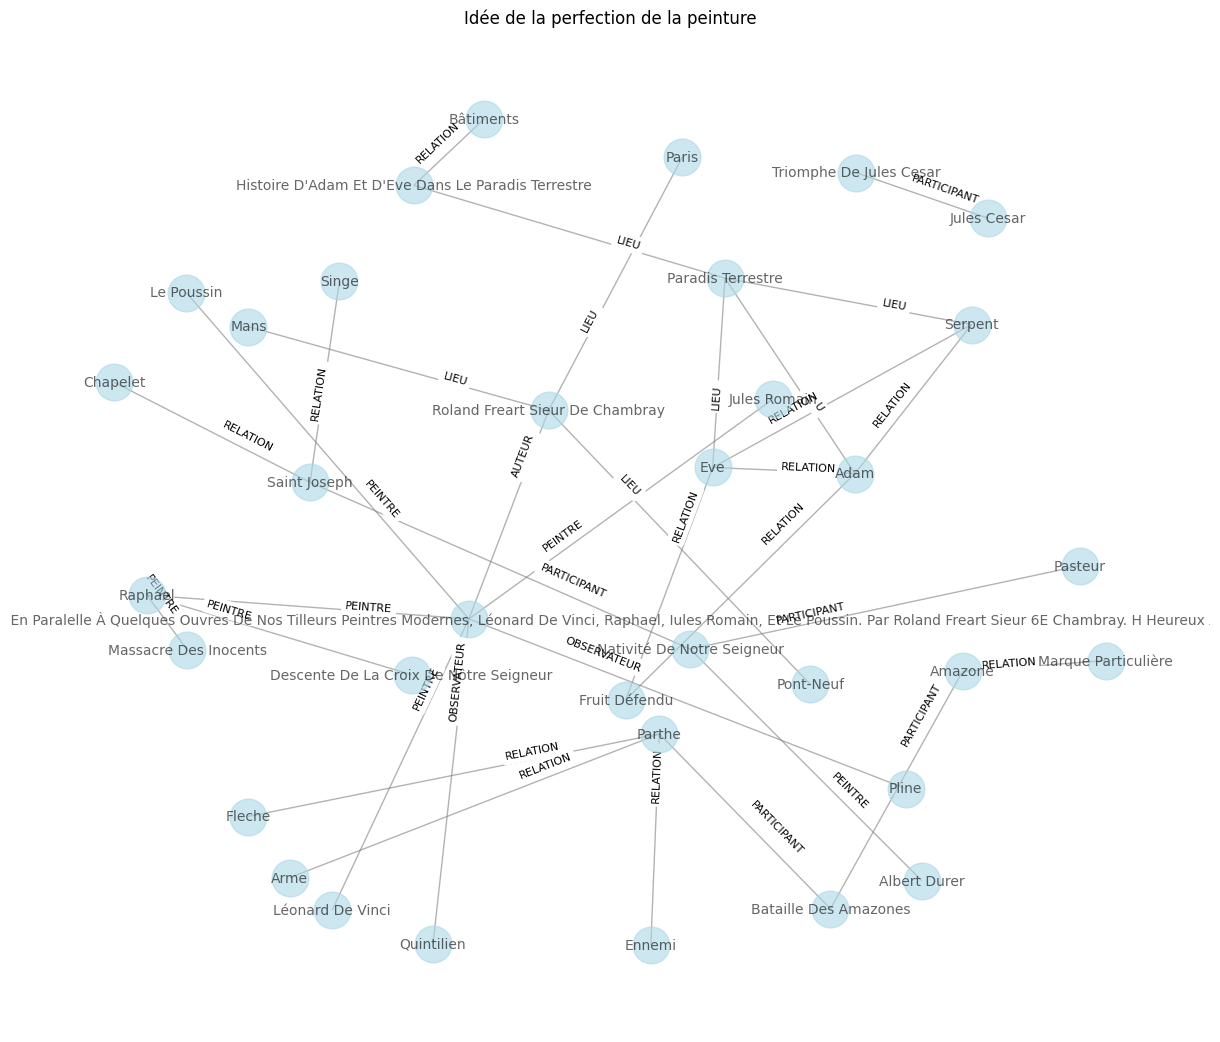

In [64]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')


plt.title('Idée de la perfection de la peinture')
plt.savefig('liv0232.png')

In [65]:
nx.write_gexf(G, "liv0232.gexf")